In [1]:
# Modulo de importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import openpyxl
import statistics as stats
from sklearn.linear_model import LinearRegression

In [4]:
planetas = {
    "Tierra": 9.8,
    "Marte": 3.7,
    "Júpiter": 24.8,
    "Saturno": 9.0,
    "Urano": 8.7,
    "Neptuno": 11.0
}

L1 = 1.00
t1 = 0.46
def calcular_g(L, t):
    g = (2 * L) / (t ** 2)
    return g


def realizar_experimento(L):
    t = round(random.uniform(0.46, 0.51), 2) 
    g = calcular_g(L, t)
    return g


experimentos_1m = [realizar_experimento(1.0) for _ in range(100)]
media_g_1m = stats.mean(experimentos_1m)
desviacion_1m = stats.stdev(experimentos_1m)
planeta_1m = min(planetas, key=lambda x: abs(planetas[x] - media_g_1m))

pesos = [1 / (desviacion_1m ** 2) for _ in experimentos_1m]
peso_media_g_1m = sum([pesos[i] * experimentos_1m[i] for i in range(len(experimentos_1m))]) / sum(pesos)
peso_desviacion_1m = (sum(((g - peso_media_g_1m) ** 2) * pesos[i] for i, g in enumerate(experimentos_1m)) / sum(pesos)) ** 0.5
peso_planeta_1m = min(planetas, key=lambda x: abs(planetas[x] - peso_media_g_1m))


min_diff_1m = float("inf")
for planeta, valor_g in planetas.items():
    diff = abs(valor_g - media_g_1m)
    if diff < min_diff_1m:
        min_diff_1m = diff
        planeta_1m = planeta


In [5]:
def calcular_error(valor_experimental, valor_teorico):
    error_porcentual = abs(valor_experimental - valor_teorico) / valor_teorico * 100
    
    return error_porcentual

g_teo = 9.8 
g_exp = 2 * L1 / (t1 ** 2) 

error = calcular_error(g_exp, g_teo)
print("El error porcentual es:", error, "%")
print("El planeta más cercano al valor experimental es:", planeta_1m)
print("La media ponderada de la aceleración de la gravedad es:", peso_media_g_1m)
print("La desviación estándar ponderada de la aceleración de la gravedad es:", peso_desviacion_1m)
print("El planeta más cercano al valor ponderado es:", peso_planeta_1m)

El error porcentual es: 3.5531036611241955 %
El planeta más cercano al valor experimental es: Urano
La media ponderada de la aceleración de la gravedad es: 8.522858639000006
La desviación estándar ponderada de la aceleración de la gravedad es: 0.5226308169261409
El planeta más cercano al valor ponderado es: Urano


In [7]:
def create_experiment_xlsx(L, n_experiments, filename):
    wb = openpyxl.Workbook()
    ws = wb.active
    ws.append(['Planeta', 'Gravedad (m/s^2)', 'Tiempo (s)', 'Distancia (m)'])

    for _ in range(n_experiments):
        t = round(random.uniform(0.46, 0.51), 2)
        g = calcular_g(L, t)
        ws.append([peso_planeta_1m, g, t, L1])

    wb.save(filename)

create_experiment_xlsx(L1, 1000, 'Datos_1º_experimento.xlsx')

In [17]:
# 1) Crear un dataframe a partir del archivo de Excel
df = pd.read_excel('Datos_1º_experimento.xlsx')
df



,Planeta,Gravedad (m/s^2),Tiempo (s),Distancia (m)
0,Urano,7.689350,0.51,1
1,Urano,8.000000,0.50,1
2,Urano,8.000000,0.50,1
3,Urano,9.053871,0.47,1
4,Urano,8.000000,0.50,1
...,...,...,...,...
995,Urano,8.000000,0.50,1
996,Urano,8.680556,0.48,1
997,Urano,9.053871,0.47,1
998,Urano,8.000000,0.50,1


In [19]:
df.describe().round(5)

,Gravedad (m/s^2),Tiempo (s),Distancia (m)
count,1000.00000,1000.00000,1000.0
mean,8.52913,0.48495,1.0
std,0.53292,0.01513,0.0
min,7.68935,0.46000,1.0
25%,8.00000,0.47000,1.0
50%,8.68056,0.48000,1.0
75%,9.05387,0.50000,1.0
max,9.45180,0.51000,1.0


In [18]:
# 2) Calcular la media, los cuartiles y la desviación típica
media = df['Gravedad (m/s^2)'].mean()
cuartiles = df['Gravedad (m/s^2)'].quantile([0.25, 0.5, 0.75])
desviacion_tipica = df['Gravedad (m/s^2)'].std()

print('Media:', media)
print('Cuartiles:', cuartiles)
print('Desviación típica:', desviacion_tipica)

Media: 8.529133222616501
Cuartiles: 0.25    8.000000
0.50    8.680556
0.75    9.053871
Name: Gravedad (m/s^2), dtype: float64
Desviación típica: 0.5329221777927239


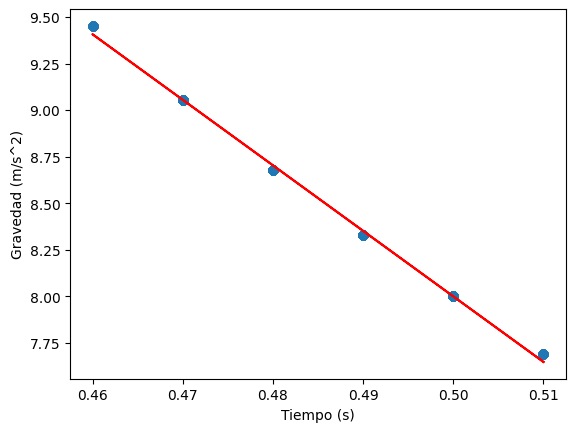

In [13]:
# 3) Calcular una regresión lineal y representarla en una gráfica
X = df[['Tiempo (s)']]
y = df['Gravedad (m/s^2)']
reg = LinearRegression().fit(X, y)

plt.scatter(X, y)
plt.plot(X, reg.predict(X), color='red')
plt.xlabel('Tiempo (s)')
plt.ylabel('Gravedad (m/s^2)')
plt.show()